# Leading sectors of CO2 emissions the top 10 european countries
In this notebook, we take a closer look at which sectors are responsible for most of the CO₂ emissions in the top five emitting countries in Europe. By breaking things down by industry and tracking changes over time, we get a better idea of where these emissions are really coming from. This helps paint a clearer picture of the challenges each country faces when it comes to cutting down their carbon footprint.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### Data loading
In the next few lines of code we load the appropriate data that we'll need to reach our set goal in this notebook. 

In [2]:
data_root = './data/'

In [3]:
# Reading the data
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')
df_co2_sectors = pd.read_csv(f'{data_root}co2_emmisions_by_sector.csv')

In [4]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

In [5]:
# Calculating the average CO2 emission by country from the year 1970 to the year 2023
year_columns = [col for col in df_co2_europe.columns if col.isdigit()]

df_avg = df_co2_europe.copy()
df_avg["Average_CO2"] = df_avg[year_columns].mean(axis=1)

df_avg_sorted = df_avg.sort_values(by="Average_CO2", ascending=False)

# Getting the top5 countries with most average emissions 
# Which we'll try to find the leading factors for that cause
df_top_5 = df_avg_sorted[["Name", "Average_CO2"]].reset_index(drop=True).head(5)
print('Top 5 european countries with most emissions:')
df_top_5

Top 5 european countries with most emissions:


,Name,Average_CO2
0,Russia,1.826988e+06
1,Germany,9.285034e+05
2,United Kingdom,5.369989e+05
3,Ukraine,4.556760e+05
4,France,4.026492e+05


In [6]:
# Creating individual dataframes for the top 5 countries with most emissions containing emission per sector
df_russia = df_co2_sectors[(df_co2_sectors["Name"] == "Russian Federation") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_germany = df_co2_sectors[(df_co2_sectors["Name"] == "Germany") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_uk = df_co2_sectors[(df_co2_sectors["Name"] == "United Kingdom") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_ukraine = df_co2_sectors[(df_co2_sectors["Name"] == "Ukraine") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_france = df_co2_sectors[(df_co2_sectors["Name"] == "France") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)

### Plotting the CO2 emission sectors of the top 5 emitting countries in Europe
By plotting emissions by sector, we gain clearer insight into which industries are the biggest contributors.

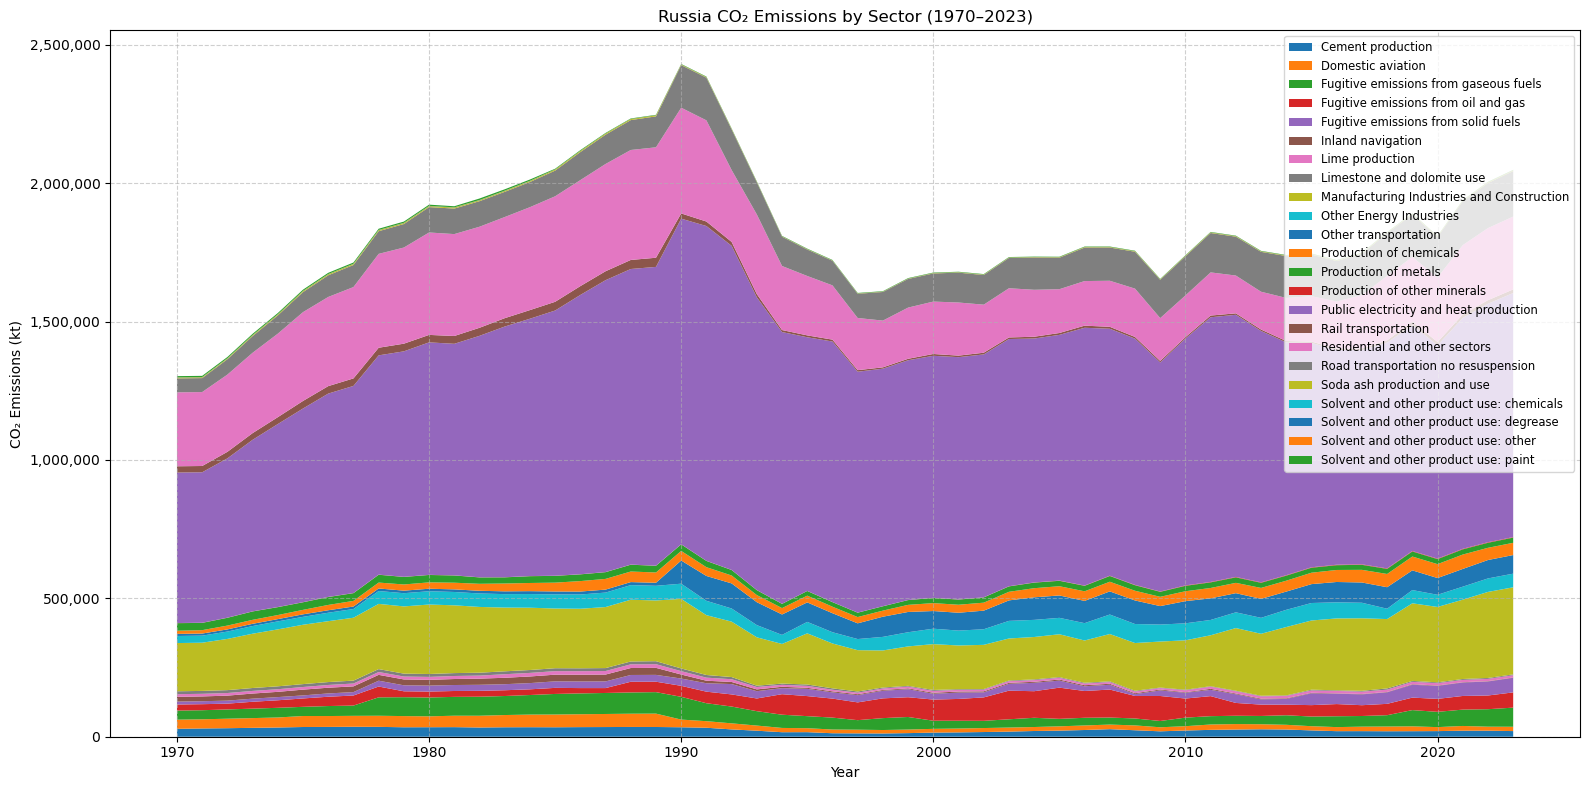

Top 10 sectors by total CO₂ emissions (Russia 1970–2023):


,Sector,Total CO₂ Emissions (kt)
0,Public electricity and heat production,4.705453e+07
1,Residential and other sectors,1.378878e+07
2,Manufacturing Industries and Construction,1.126880e+07
3,Road transportation no resuspension,6.086192e+06
4,Fugitive emissions from oil and gas,2.710711e+06
5,Other transportation,2.682177e+06
6,Other Energy Industries,2.634769e+06
7,Fugitive emissions from gaseous fuels,2.540304e+06
8,Production of chemicals,1.671618e+06
9,Cement production,1.390125e+06


In [7]:
# Ploting CO2 timeline emission by sector for Russia
year_columns = [col for col in df_russia.columns if col.isdigit()]
df_russia_sector = df_russia.groupby("Sector")[year_columns].sum()
years = list(map(int, year_columns))
data = df_russia_sector.values

plt.figure(figsize=(16, 8))
plt.stackplot(years, data, labels=df_russia_sector.index)

plt.title('Russia CO₂ Emissions by Sector (1970–2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

total_emissions_by_sector = df_russia_sector.sum(axis=1).sort_values(ascending=False).reset_index()
total_emissions_by_sector.columns = ['Sector', 'Total CO₂ Emissions (kt)']

print("Top 10 sectors by total CO₂ emissions (Russia 1970–2023):")
total_emissions_by_sector.head(10)

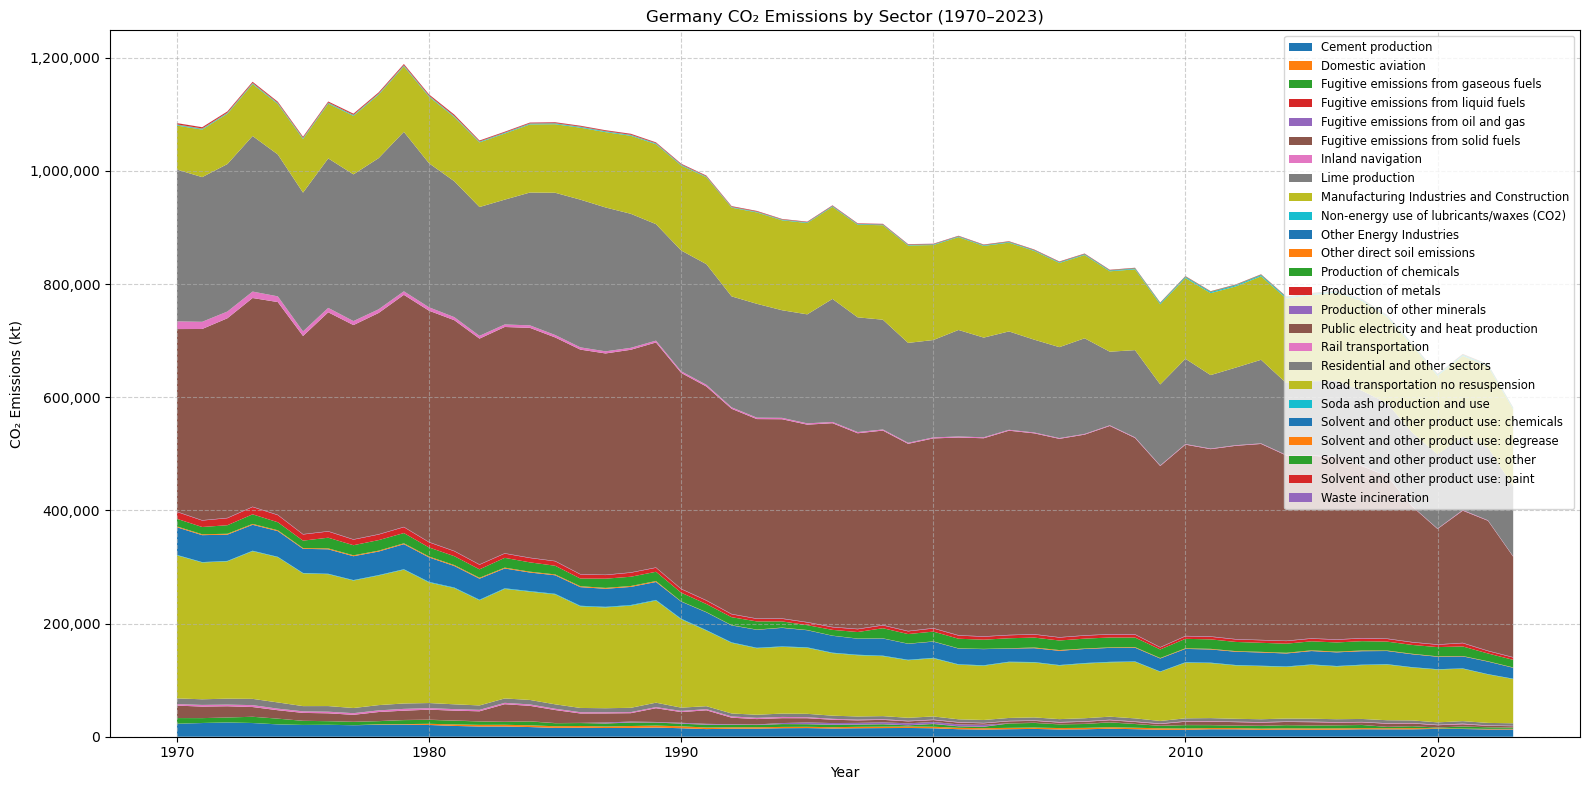

Top 10 sectors by total CO₂ emissions (Germany 1970–2023):


,Sector,Total CO₂ Emissions (kt)
0,Public electricity and heat production,1.872016e+07
1,Residential and other sectors,1.050634e+07
2,Manufacturing Industries and Construction,7.773855e+06
3,Road transportation no resuspension,7.400572e+06
4,Other Energy Industries,1.672240e+06
5,Cement production,8.561514e+05
6,Production of chemicals,8.432975e+05
7,Fugitive emissions from solid fuels,5.683572e+05
8,Production of metals,3.554533e+05
9,Lime production,3.547517e+05


In [8]:
# Ploting CO2 timeline emission by sector for Germany
year_columns = [col for col in df_germany.columns if col.isdigit()]
df_germany_sector = df_germany.groupby("Sector")[year_columns].sum()
years = list(map(int, year_columns))
data = df_germany_sector.values

plt.figure(figsize=(16, 8))
plt.stackplot(years, data, labels=df_germany_sector.index)

plt.title('Germany CO₂ Emissions by Sector (1970–2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

total_emissions_by_sector = df_germany_sector.sum(axis=1).sort_values(ascending=False).reset_index()
total_emissions_by_sector.columns = ['Sector', 'Total CO₂ Emissions (kt)']

print("Top 10 sectors by total CO₂ emissions (Germany 1970–2023):")
total_emissions_by_sector.head(10)

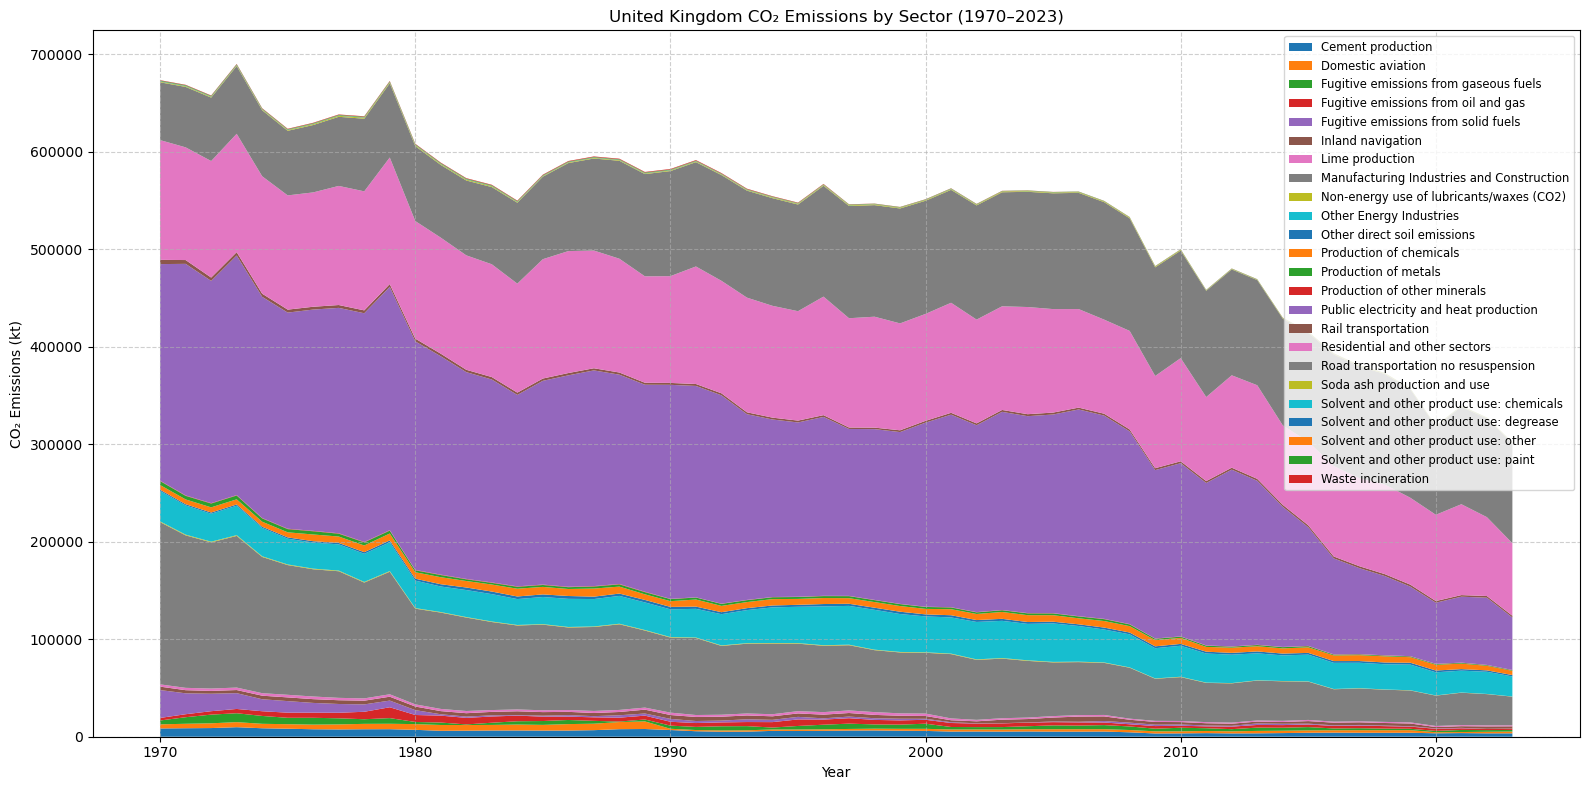

Top 10 sectors by total CO₂ emissions (United Kingdom 1970–2023):


,Sector,Total CO₂ Emissions (kt)
0,Public electricity and heat production,9.909956e+06
1,Residential and other sectors,5.829696e+06
2,Road transportation no resuspension,5.333411e+06
3,Manufacturing Industries and Construction,4.073104e+06
4,Other Energy Industries,1.652153e+06
5,Production of chemicals,3.333844e+05
6,Cement production,3.134172e+05
7,Fugitive emissions from oil and gas,2.185957e+05
8,Fugitive emissions from solid fuels,1.992390e+05
9,Fugitive emissions from gaseous fuels,1.976331e+05


In [9]:
# Ploting CO2 timeline emission by sector for the United Kingdom
year_columns = [col for col in df_uk.columns if col.isdigit()]
df_uk_sector = df_uk.groupby("Sector")[year_columns].sum()
years = list(map(int, year_columns))
data = df_uk_sector.values

plt.figure(figsize=(16, 8))
plt.stackplot(years, data, labels=df_uk_sector.index)

plt.title('United Kingdom CO₂ Emissions by Sector (1970–2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

total_emissions_by_sector = df_uk_sector.sum(axis=1).sort_values(ascending=False).reset_index()
total_emissions_by_sector.columns = ['Sector', 'Total CO₂ Emissions (kt)']

print("Top 10 sectors by total CO₂ emissions (United Kingdom 1970–2023):")
total_emissions_by_sector.head(10)

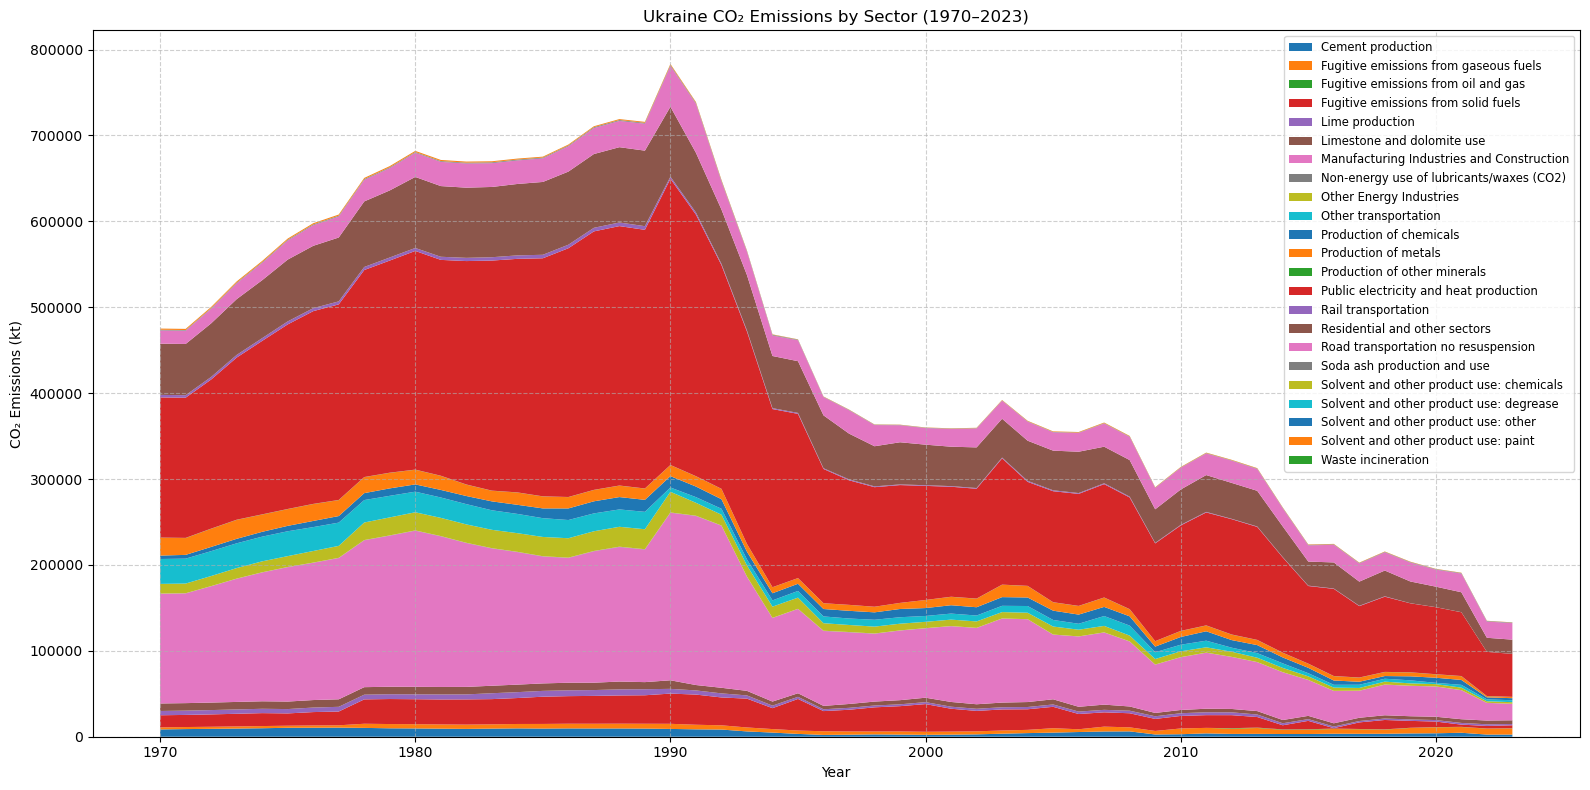

Top 10 sectors by total CO₂ emissions (Ukraine 1970–2023):


,Sector,Total CO₂ Emissions (kt)
0,Public electricity and heat production,9.562930e+06
1,Manufacturing Industries and Construction,5.761087e+06
2,Residential and other sectors,3.016436e+06
3,Road transportation no resuspension,1.334813e+06
4,Fugitive emissions from solid fuels,1.123626e+06
5,Other transportation,7.109526e+05
6,Other Energy Industries,6.158893e+05
7,Production of metals,5.914756e+05
8,Production of chemicals,4.570946e+05
9,Limestone and dolomite use,3.380461e+05


In [10]:
# Ploting CO2 timeline emission by sector for Ukraine
year_columns = [col for col in df_ukraine.columns if col.isdigit()]
df_ukraine_sector = df_ukraine.groupby("Sector")[year_columns].sum()
years = list(map(int, year_columns))
data = df_ukraine_sector.values

plt.figure(figsize=(16, 8))
plt.stackplot(years, data, labels=df_ukraine_sector.index)

plt.title('Ukraine CO₂ Emissions by Sector (1970–2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

total_emissions_by_sector = df_ukraine_sector.sum(axis=1).sort_values(ascending=False).reset_index()
total_emissions_by_sector.columns = ['Sector', 'Total CO₂ Emissions (kt)']

print("Top 10 sectors by total CO₂ emissions (Ukraine 1970–2023):")
total_emissions_by_sector.head(10)

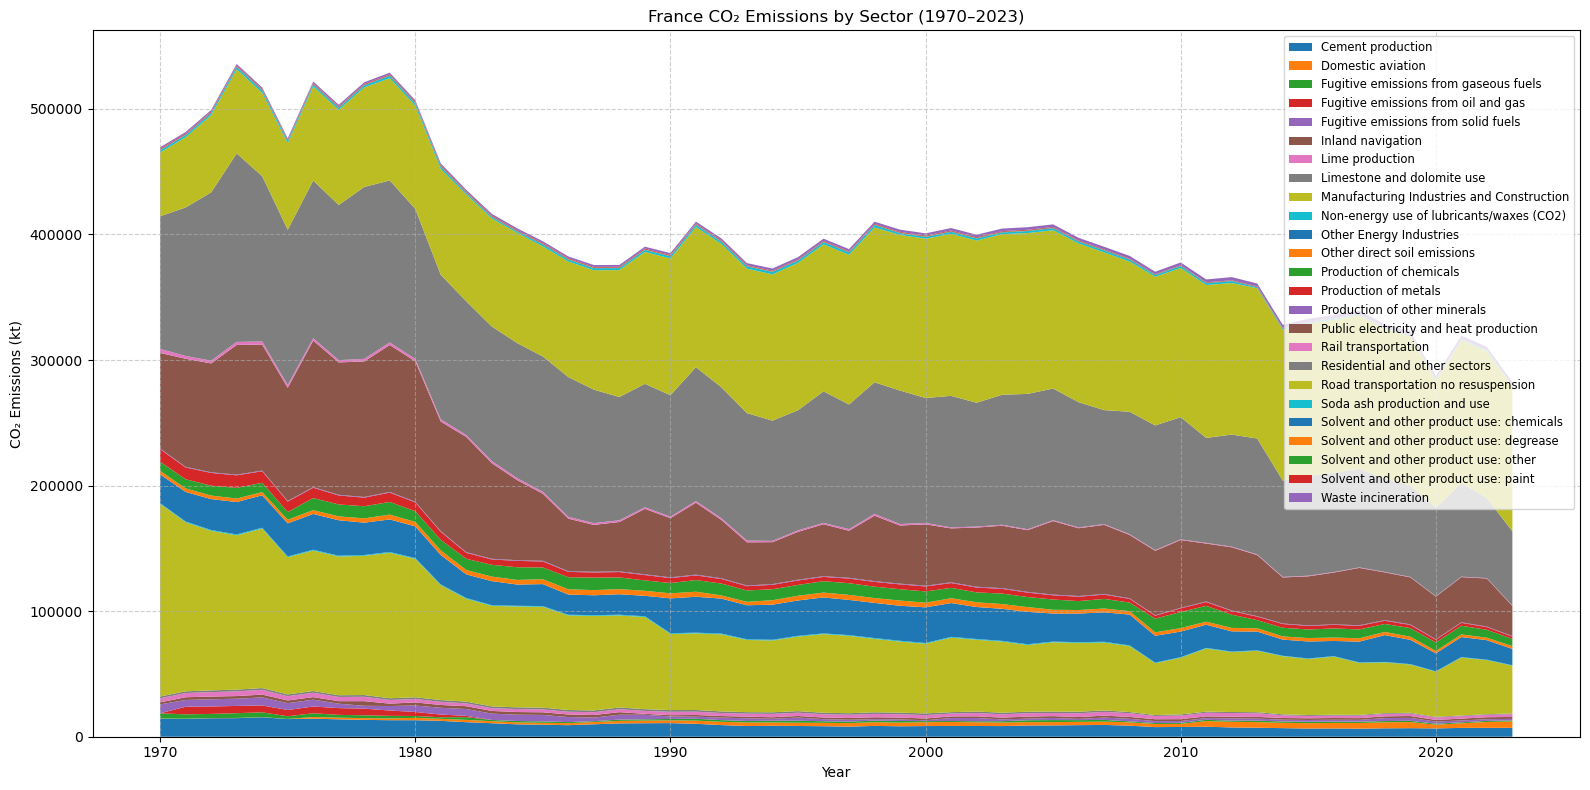

Top 10 sectors by total CO₂ emissions (France 1970–2023):


,Sector,Total CO₂ Emissions (kt)
0,Road transportation no resuspension,5.662050e+06
1,Residential and other sectors,5.469913e+06
2,Manufacturing Industries and Construction,3.792981e+06
3,Public electricity and heat production,3.155023e+06
4,Other Energy Industries,1.194096e+06
5,Cement production,5.250496e+05
6,Production of chemicals,4.567585e+05
7,Production of metals,2.433023e+05
8,Other direct soil emissions,1.721459e+05
9,Fugitive emissions from solid fuels,1.525196e+05


In [11]:
# Ploting CO2 timeline emission by sector for France
year_columns = [col for col in df_france.columns if col.isdigit()]
df_france_sector = df_france.groupby("Sector")[year_columns].sum()
years = list(map(int, year_columns))
data = df_france_sector.values

plt.figure(figsize=(16, 8))
plt.stackplot(years, data, labels=df_france_sector.index)

plt.title('France CO₂ Emissions by Sector (1970–2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (kt)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

total_emissions_by_sector = df_france_sector.sum(axis=1).sort_values(ascending=False).reset_index()
total_emissions_by_sector.columns = ['Sector', 'Total CO₂ Emissions (kt)']

print("Top 10 sectors by total CO₂ emissions (France 1970–2023):")
total_emissions_by_sector.head(10)

## List of leading factors in CO2 emission

From the stacked area plots of CO2 emissions per sector for the top 5 european countries with most emissions we can see that the most impactful sectors for CO2 emissions are:
* Public electricity and heat production
* Residential and other sectors
* Manufacturing Industries and Construction
* Road transportation no resuspension
* Other Energy Industrie
* Cement production
* Production of chemicals
* Fugitive emissions from solid fuels
* Production of metals
* Lime production
* Fugitive emissions from oil and gas
* Fugitive emissions from gaseous fuels
* Other direct soil emissions
* Inland navigation
* Rail transportation
* And others...

The analysis reveals that sectors like electricity and heat production, residential use, road transport, manufacturing industries and construction, cement production, production of metals and others are the main contributors to CO₂ emissions in Europe’s top-emitting countries. Their strong alignment with total emissions suggests high impact. In the next step, we will focus on these key sectors to explore potential correlations in the data.